In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 分布の確認

In [6]:
import seaborn as sns

C:\Users\jin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


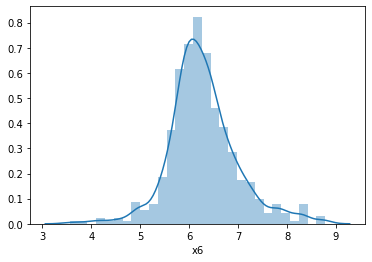

In [7]:
sns.distplot(df['x6'])

## 外れ値除去（３シグマ方）

In [8]:
col = 'x6'

In [9]:
mean = df.mean()

In [10]:
mean[col]

6.284634387351788

In [11]:
# 標準偏差（standard deviation）
sigma = df.std()

In [12]:
sigma[col]

0.7026171434153234

In [13]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [14]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [17]:
df2 = df[(df[col] > low) & (df[col] < high)]

In [21]:
df.shape

(506, 14)

In [22]:
df2.shape

(498, 14)

C:\Users\jin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


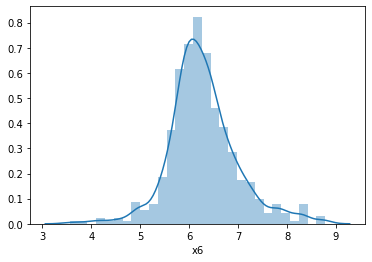

In [23]:
sns.distplot(df[col])

C:\Users\jin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


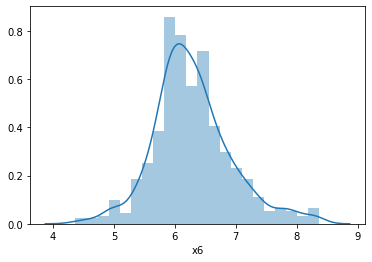

In [24]:
sns.distplot(df2[col])

In [27]:
cols = df.columns

In [28]:
_df = df.copy()
for col in cols:
    # 3σ法の上下限値を設定
    sigma = df.std()
    low = mean[col] - 3 * sigma[col]
    high= mean[col] + 3 * sigma[col]
    # 条件での絞り込み
    _df = _df[(_df[col] < high) & (_df[col]>low)]

In [29]:
_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
df.shape

(506, 14)

In [32]:
# 3σ適用後
_df.shape

(415, 14)

対処法
- 外れ値を取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析を使って，洗剤変数に変換したあとに３シグマ方を適用

# モデル構築

In [33]:
_df.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


## 入力変数と出力変数に分ける

In [34]:
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

## 訓練データと検証データに分割

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

## 重回帰分析

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# モデルを宣言
model = LinearRegression()

In [39]:
# モデルの学習
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
# 検証←訓練データ
model.score(X_train,y_train)

0.7972109224535134

In [41]:
# 検証←検証データ
model.score(X_test,y_test)

0.6253776004329588

## ↑過学習

# スケーリング ←重みのみで重要な変数を知るため

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# scalerの宣言
scaler = StandardScaler()

In [44]:
# scalerの学習←平均と標準偏差を計算
scaler.fit(X_train)

C:\Users\jin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

C:\Users\jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
X_train2

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

In [47]:
# モデルの宣言
model = LinearRegression()

In [48]:
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
model.score(X_train2,y_train)

0.7972109224535133

In [50]:
model.score(X_test2,y_test)

0.6253776004329599

In [51]:
model.coef_

array([-0.19542642,  0.21154333,  0.50827735,  0.        , -1.21336016,
        3.91986658, -0.36986122, -1.85711554,  1.16625182, -1.52855186,
       -1.8725663 ,  0.24442708, -2.76100147])

In [52]:
np.set_printoptions(precision=2,suppress=True)

In [53]:
model.coef_

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])